# Classificação de diabetes

* Base de dados utilizada para prever se um paciente tem diabetes baseado em diagnósticos
* Somente mulheres com até 21 anos de idade!

<img src=img/diabetes_input.png>

* INPUTS (entradas):
* * Pregnancies: Número de vezes que ficou grávida
* * GlucosePlasma: Concentração de glicose
* * BloodPressure:  Pressão sanguínea
* * Skin: Espessura da dobra do tríceps
* * Insulin: Insulina sérica de 2 horas
* * BMI: Índice de massa corporal
* * DiabetesPedigreeFunction: Histórico de diabetes na família
* * Age: Idade

<br>

* OUTPUTS:
* * Diabetes or no diabetes (0 or 1)


<img src=img/diabetes_rna.png>

- Base de dados
Acknowledgements Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

# Etapa 1: Importação das bibliotecas

In [ ]:
# descomentar para google colab 
# %tensorflow_version 2.x

In [41]:
# descomentar para google colab 
# %tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import os
import warnings
tf.__version__

warnings.filterwarnings('ignore')

# Etapa 2: Importação da base de dados

In [42]:
df = pd.read_csv('diabetes.csv')

In [43]:
plt.rcParams['figure.dpi'] = 120

print("Shape:", df.shape)
print("Colunas:", df.columns.tolist())
display(df.head())

Shape: (768, 9)
Colunas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
print("\nDtypes:")
print(df.dtypes)
print("\nContagem de valores nulos por coluna:")
print(df.isna().sum())


Dtypes:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Contagem de valores nulos por coluna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [45]:
display(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [46]:
if 'Outcome' in df.columns:
    print("\nContagem de classes (Outcome):")
    print(df['Outcome'].value_counts())
    print("\nProporção:")
    print(df['Outcome'].value_counts(normalize=True))


Contagem de classes (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

Proporção:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [47]:
candidates = ['Glucose','GlucosePlasma','BloodPressure','SkinThickness','Skin','Insulin','BMI','BodyMassIndex']
present = [c for c in candidates if c in df.columns]
print("Colunas numéricas encontradas entre as sensíveis a zeros:", present)

Colunas numéricas encontradas entre as sensíveis a zeros: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [48]:
zero_counts = {c: int((df[c]==0).sum()) for c in present}
print("Contagem de zeros nessas colunas (zeros podem representar medição faltante):")
for k,v in zero_counts.items():
    print(f"  {k}: {v}")

Contagem de zeros nessas colunas (zeros podem representar medição faltante):
  Glucose: 5
  BloodPressure: 35
  SkinThickness: 227
  Insulin: 374
  BMI: 11


In [49]:
df_zero_nan = df.copy()
for c in present:
    df_zero_nan[c] = df_zero_nan[c].replace(0, np.nan)
print("Contagem de NaNs após zero->NaN:")
print(df_zero_nan.isna().sum())

Contagem de NaNs após zero->NaN:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [50]:
age_col = None
for c in df.columns:
    if c.lower() == 'age':
        age_col = c
        break

if age_col:
    df_young = df[df[age_col] <= 21].copy()
    print(f"Subconjunto idade<=21: {df_young.shape[0]} registros (coluna usada: '{age_col}')")
else:
    df_young = df.copy()
    print("Coluna 'Age' não encontrada; usando todo o dataset.")

Subconjunto idade<=21: 63 registros (coluna usada: 'Age')


In [51]:
display(df_young.describe().T)
if 'Outcome' in df_young.columns:
    print("\nContagem de Outcome no subconjunto jovem:")
    print(df_young['Outcome'].value_counts())

,count,mean,std,min,25%,50%,75%,max
Pregnancies,63.0,1.079365,1.020777,0.000,0.00,1.000,2.000,4.000
Glucose,63.0,108.317460,25.003113,0.000,95.00,108.000,125.000,177.000
BloodPressure,63.0,65.936508,14.657238,0.000,60.00,64.000,74.000,96.000
SkinThickness,63.0,19.349206,12.622508,0.000,13.50,20.000,27.000,50.000
Insulin,63.0,73.634921,109.658164,0.000,0.00,40.000,94.000,480.000
BMI,63.0,27.817460,9.011203,0.000,24.00,27.400,33.400,43.500
DiabetesPedigreeFunction,63.0,0.433825,0.279558,0.078,0.25,0.389,0.548,1.731
Age,63.0,21.000000,0.000000,21.000,21.00,21.000,21.000,21.000
Outcome,63.0,0.079365,0.272479,0.000,0.00,0.000,0.000,1.000



Contagem de Outcome no subconjunto jovem:
Outcome
0    58
1     5
Name: count, dtype: int64


In [52]:
if 'Outcome' in df_young.columns:
    corr = df_young.select_dtypes(include=[np.number]).corr()
    if 'Outcome' in corr.columns:
        print("Correlação (Pearson) com Outcome (subconjunto idade<=21):")
        print(corr['Outcome'].sort_values(ascending=False))

Correlação (Pearson) com Outcome (subconjunto idade<=21):
Outcome                     1.000000
Glucose                     0.367932
BMI                         0.319989
SkinThickness               0.226289
DiabetesPedigreeFunction    0.221030
Insulin                     0.149431
BloodPressure               0.098207
Pregnancies                -0.138989
Age                              NaN
Name: Outcome, dtype: float64


In [53]:
os.makedirs('eda_plots', exist_ok=True)

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = num_cols[:12]

fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(8, 2.2*len(num_cols)))
for ax, col in zip(axes, num_cols):
    ax.hist(df_young[col].dropna(), bins=30)
    ax.set_title(f'Histograma — {col} (idade<=21)')
plt.tight_layout()
fig.savefig('eda_plots/histograms_age_le_21.png')
plt.close(fig)

fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(3*len(num_cols), 4))
for ax, col in zip(axes, num_cols):
    ax.boxplot(df_young[col].dropna(), vert=True, showfliers=True)
    ax.set_title(col)
plt.tight_layout()
fig.savefig('eda_plots/boxplots_age_le_21.png')
plt.close(fig)

if len(num_cols) >= 2 and not df_young[num_cols].dropna().empty:
    scatter_matrix(df_young[num_cols].dropna(), alpha=0.6, diagonal='hist', figsize=(10,10))
    plt.suptitle('Scatter matrix (idade<=21)')
    plt.savefig('eda_plots/scatter_matrix_age_le_21.png')
    plt.close()

if len(num_cols) > 0 and not df_young[num_cols].dropna().empty:
    corr = df_young[num_cols].corr()
    fig, ax = plt.subplots(figsize=(8,6))
    im = ax.imshow(corr, interpolation='nearest', cmap='coolwarm')
    ax.set_xticks(range(len(num_cols))); ax.set_xticklabels(num_cols, rotation=90)
    ax.set_yticks(range(len(num_cols))); ax.set_yticklabels(num_cols)
    fig.colorbar(im, ax=ax)
    plt.title('Heatmap de correlação (idade<=21) — Pearson')
    plt.savefig('eda_plots/corr_heatmap_age_le_21.png')
    plt.close()

print("\nPlots salvos na pasta 'eda_plots' (histograms, boxplots, scatter_matrix, heatmap).")
print("Resumo CSVs gerados: describe_full.csv e describe_young.csv")
df.describe().to_csv('eda_plots/describe_full.csv')
df_young.describe().to_csv('eda_plots/describe_young.csv')


Plots salvos na pasta 'eda_plots' (histograms, boxplots, scatter_matrix, heatmap).
Resumo CSVs gerados: describe_full.csv e describe_young.csv


In [54]:
if age_col and 'Outcome' in df.columns:
    pivot = df.groupby([age_col, 'Outcome']).size().unstack(fill_value=0)
    pivot.to_csv('eda_plots/age_outcome_pivot.csv')
    display(pivot)

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


# Etapa 3: Limpeza e visualização dos dados


In [55]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

print("Shape original:", df.shape)

df.columns = df.columns.str.strip()

zero_invalid_cols = [
    'GlucosePlasma', 'Glucose',
    'BloodPressure',
    'Skin', 'SkinThickness',
    'Insulin',
    'BMI'
]

cols_to_fix = [c for c in zero_invalid_cols if c in df.columns]

for col in cols_to_fix:
    df[col] = df[col].replace(0, np.nan)

print("\nZeros substituídos por NaN nas colunas:", cols_to_fix)
print("\nMissing após essa etapa:")
print(df.isna().sum())

Shape original: (768, 9)

Zeros substituídos por NaN nas colunas: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Missing após essa etapa:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [56]:
dup_count = df.duplicated().sum()
df = df.drop_duplicates()
print(f"Duplicatas removidas: {dup_count}")

Duplicatas removidas: 0


In [57]:
if 'Age' in df.columns:
    df = df[df['Age'] <= 21].copy()
    print("Filtro aplicado: Age <= 21")
else:
    print("Coluna 'Age' não encontrada — pulando filtro de idade.")

Filtro aplicado: Age <= 21


In [58]:
num_cols = df.select_dtypes(include=[np.number]).columns
num_cols = [c for c in num_cols if c != 'Outcome']  

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

for col in num_cols:
    outliers = (df[col] < lower[col]) | (df[col] > upper[col])
    df.loc[outliers, col] = np.nan

print("Outliers tratados via IQR e marcados como NaN")

Outliers tratados via IQR e marcados como NaN


In [59]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Missing após imputação KNN:")
print(df_imputed.isna().sum())

Missing após imputação KNN:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [60]:
scaler = StandardScaler()

features = df_imputed.drop('Outcome', axis=1)
target = df_imputed['Outcome']

scaled_features = pd.DataFrame(
    scaler.fit_transform(features),
    columns=features.columns
)

df_clean = pd.concat([scaled_features, target.reset_index(drop=True)], axis=1)

print("Shape final:", df_clean.shape)


df_clean.to_csv("diabetes_cleaned.csv", index=False)
print("Arquivo salvo: diabetes_cleaned.csv")

Shape final: (63, 9)
Arquivo salvo: diabetes_cleaned.csv


In [61]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes_cleaned.csv")

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,       
    random_state=42,     
    stratify=y           
)

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (50, 8)
Shape X_test: (13, 8)
Shape y_train: (50,)
Shape y_test: (13,)


# Etapa 4: Construção e treinamento do modelo

class_weight: {np.float64(0.0): np.float64(0.5434782608695652), np.float64(1.0): np.float64(6.25)}


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 400)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,089 (230.82 KB)

 Trainable params: 59,089 (230.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200

Epoch 1: val_loss improved from None to 0.63129, saving model to best_diabetes_model.h5


4/4 - 2s - 505ms/step - accuracy: 0.2800 - loss: 0.6644 - val_accuracy: 0.7692 - val_loss: 0.6313 - learning_rate: 0.0010
Epoch 2/200

Epoch 2: val_loss improved from 0.63129 to 0.53231, saving model to best_diabetes_model.h5


4/4 - 0s - 50ms/step - accuracy: 0.8600 - loss: 0.6014 - val_accuracy: 0.8462 - val_loss: 0.5323 - learning_rate: 0.0010
Epoch 3/200

Epoch 3: val_loss improved from 0.53231 to 0.49394, saving model to best_diabetes_model.h5


4/4 - 0s - 33ms/step - accuracy: 0.8600 - loss: 0.4844 - val_accuracy: 0.8462 - val_loss: 0.4939 - learning_rate: 0.0010
Epoch 4/200

Epoch 4: val_loss improved from 0.49394 to 0.45789, saving model to best_diabetes_model.h5


4/4 - 0s - 32ms/step - accuracy: 0.8800 - loss: 0.4445 - val_accuracy: 0.7692 - val_loss: 0.4579 - learning_rate: 0.0010
Epoch 5/200

Epoch 5: val_loss improved from 0.45789 to 0.40508, saving model to best_diabetes_model.h5


4/4 - 0s - 51ms/step - accuracy: 0.9000 - loss: 0.3821 - val_accuracy: 0.8462 - val_loss: 0.4051 - learning_rate: 0.0010
Epoch 6/200

Epoch 6: val_loss improved from 0.40508 to 0.34775, saving model to best_diabetes_model.h5


4/4 - 0s - 43ms/step - accuracy: 0.9000 - loss: 0.3046 - val_accuracy: 0.9231 - val_loss: 0.3477 - learning_rate: 0.0010
Epoch 7/200

Epoch 7: val_loss improved from 0.34775 to 0.30239, saving model to best_diabetes_model.h5


4/4 - 0s - 48ms/step - accuracy: 0.9000 - loss: 0.2773 - val_accuracy: 0.8462 - val_loss: 0.3024 - learning_rate: 0.0010
Epoch 8/200

Epoch 8: val_loss improved from 0.30239 to 0.28036, saving model to best_diabetes_model.h5


4/4 - 0s - 51ms/step - accuracy: 0.9400 - loss: 0.2259 - val_accuracy: 0.8462 - val_loss: 0.2804 - learning_rate: 0.0010
Epoch 9/200

Epoch 9: val_loss improved from 0.28036 to 0.27933, saving model to best_diabetes_model.h5


4/4 - 0s - 42ms/step - accuracy: 0.9400 - loss: 0.1786 - val_accuracy: 0.8462 - val_loss: 0.2793 - learning_rate: 0.0010
Epoch 10/200

Epoch 10: val_loss did not improve from 0.27933
4/4 - 0s - 21ms/step - accuracy: 0.9400 - loss: 0.1537 - val_accuracy: 0.8462 - val_loss: 0.2893 - learning_rate: 0.0010
Epoch 11/200

Epoch 11: val_loss did not improve from 0.27933
4/4 - 0s - 50ms/step - accuracy: 0.9600 - loss: 0.1599 - val_accuracy: 0.8462 - val_loss: 0.3088 - learning_rate: 0.0010
Epoch 12/200

Epoch 12: val_loss did not improve from 0.27933
4/4 - 0s - 27ms/step - accuracy: 0.9600 - loss: 0.1681 - val_accuracy: 0.8462 - val_loss: 0.3350 - learning_rate: 0.0010
Epoch 13/200

Epoch 13: val_loss did not improve from 0.27933
4/4 - 0s - 43ms/step - accuracy: 0.9400 - loss: 0.1431 - val_accuracy: 0.8462 - val_loss: 0.3687 - learning_rate: 0.0010
Epoch 14/200

Epoch 14: val_loss did not improve from 0.27933
4/4 - 0s - 47ms/step - accuracy: 0.9400 - loss: 0.1310 - val_accuracy: 0.8462 - val_l

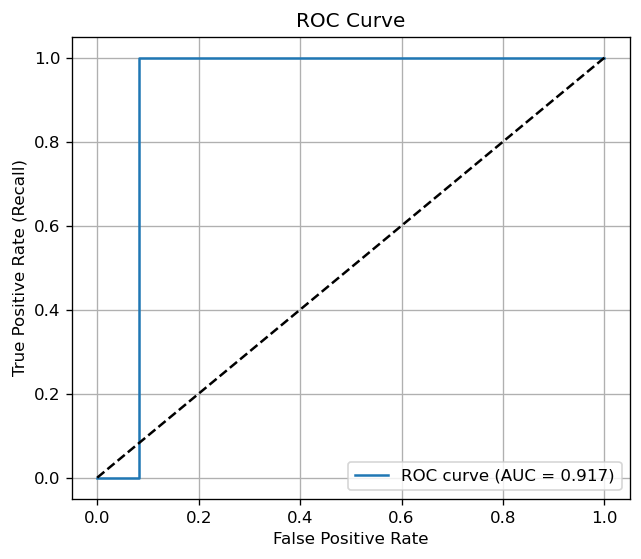

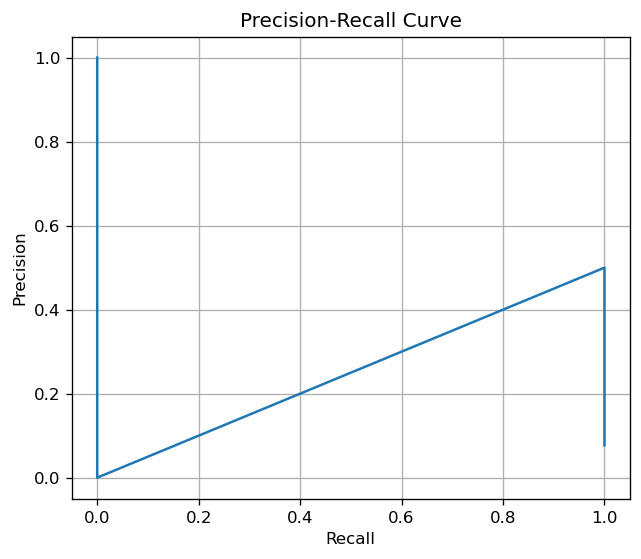

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,
                             roc_curve, precision_recall_curve, auc, precision_score,
                             recall_score, f1_score)
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

df = pd.read_csv("diabetes_cleaned.csv")
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values


classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = {k: v for k, v in zip(classes, class_weights)}
print("class_weight:", class_weight_dict)

#  Alternativa com SMOTE
use_smote = False  
if use_smote:
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    print("Antes SMOTE:", np.bincount(y_train.astype(int)))
    print("Depois SMOTE:", np.bincount(y_train_res.astype(int)))
else:
    X_train_res, y_train_res = X_train, y_train


def build_model(input_dim):
    model = Sequential()
    model.add(Dense(units=400, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model(X_train.shape[1])
model.summary()


es = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True, verbose=1)
chk = ModelCheckpoint("best_diabetes_model.h5", monitor='val_loss', save_best_only=True, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, verbose=1)


history = model.fit(
    X_train_res, y_train_res,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=16,
    callbacks=[es, chk, rlr],
    class_weight=class_weight_dict if not use_smote else None,
    verbose=2
)


y_prob = model.predict(X_test).ravel()
y_pred_default = (y_prob >= 0.5).astype(int)

print("Matriz de confusão (threshold=0.5):")
print(confusion_matrix(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default, zero_division=0))
print("AUC ROC:", roc_auc_score(y_test, y_prob))


precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-12)

ix_f1 = np.nanargmax(f1_scores)
best_threshold_f1 = thresholds_pr[ix_f1] if ix_f1 < len(thresholds_pr) else 0.5
best_f1 = f1_scores[ix_f1]

target_recall = 0.90
candidates = [(th, p, r) for p, r, th in zip(precisions, recalls, np.append(thresholds_pr, 1.0)) if r >= target_recall]
if candidates:
    best_candidate = max(candidates, key=lambda x: x[1])
    chosen_threshold_target_recall = best_candidate[0]
else:
    chosen_threshold_target_recall = None

print(f"Melhor threshold por F1: {best_threshold_f1:.3f} (F1={best_f1:.3f})")
if chosen_threshold_target_recall:
    print(f"Threshold que alcança recall>={target_recall}: {chosen_threshold_target_recall:.3f}")
else:
    print(f"Nenhum threshold alcança recall>={target_recall} sem sacrificar precision excessively.")


def evaluate_at_threshold(th):
    y_pred = (y_prob >= th).astype(int)
    print(f"\n--- Avaliação em threshold = {th:.3f} ---")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))
    print("Recall (1):", recall_score(y_test, y_pred, pos_label=1))
    print("Precision (1):", precision_score(y_test, y_pred, pos_label=1))
    print("F1 (1):", f1_score(y_test, y_pred, pos_label=1))
    return y_pred

evaluate_at_threshold(0.5)
evaluate_at_threshold(best_threshold_f1)
if chosen_threshold_target_recall:
    evaluate_at_threshold(chosen_threshold_target_recall)


fpr, tpr, roc_th = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


# Etapa 6: Avaliação do modelo

Chaves do histórico de treinamento:
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


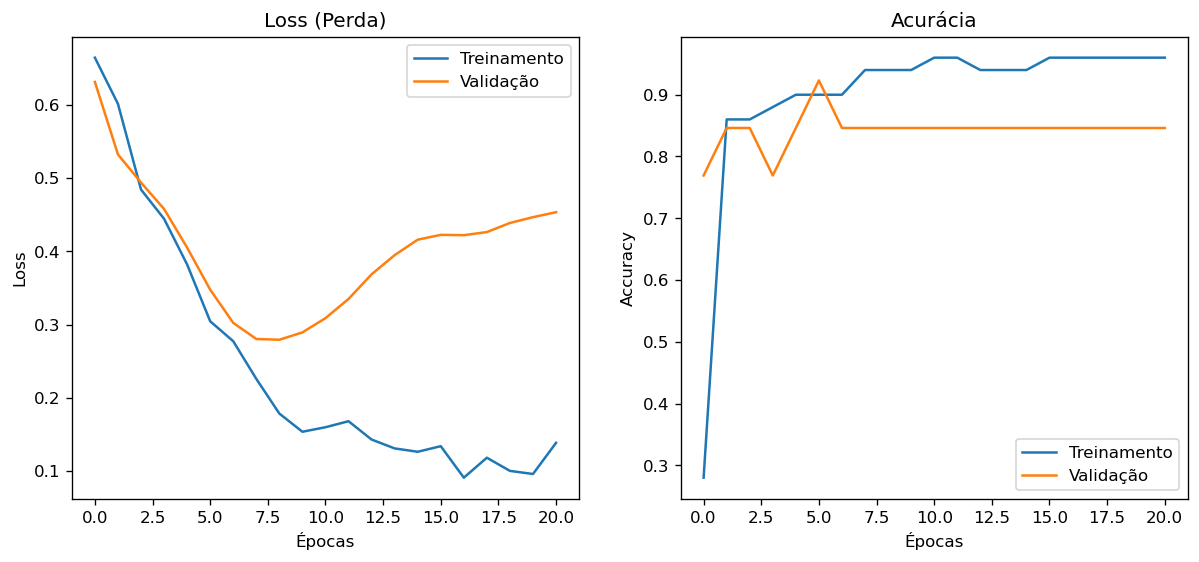

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Matriz de Confusão:
[[11  1]
 [ 1  0]]


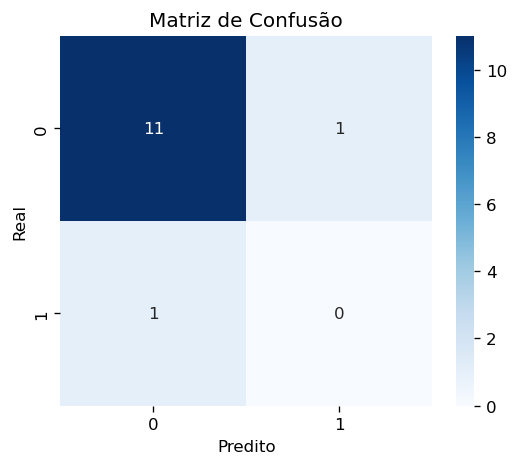


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        12
         1.0       0.00      0.00      0.00         1

    accuracy                           0.85        13
   macro avg       0.46      0.46      0.46        13
weighted avg       0.85      0.85      0.85        13

Acurácia: 0.8461538461538461
AUC ROC: 0.9166666666666666


In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Chaves do histórico de treinamento:")
print(history.history.keys())

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss (Perda)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, zero_division=0))

acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred_prob)

print(f"Acurácia: {acc}")
print(f"AUC ROC: {roc}")